In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 로드

In [3]:
# 데이터 로드
dt_16 = pd.read_sas('./data/GP16_2017(200306).sas7bdat', format='sas7bdat')
dt_17 = pd.read_sas('./data/GP17__2018.sas7bdat', format='sas7bdat')
dt_18 = pd.read_sas('./data/GP18__2019.sas7bdat', format='sas7bdat')
dt_19 = pd.read_sas('./data/GP19__2020.sas7bdat', format='sas7bdat')

In [4]:
feature_list_19 = ['g191pid','g191branch','g191found','g191course','g191daynight','g191majorcat','g191school','g191area','g191sex','g191age','g191a161','g191b022','g191b023','g191b036','g191b038','g191b039','g191b040','g191f009','g191i001','g191i033','g191i037','g191i042','g191i046','g191i066','g191i076','g191l001','g191l009','g191l016','g191m002','g191k110','g191k004','g191k007','g191k009','g191k011','g191q001','g191q002','g191q003','g191q004','g191q006','g191p001','g191p028z','g191p031z','g191p036','g191p045']
feature_list_18 = ['g181pid','g181branch','g181found','g181course','g181daynight','g181majorcat','g181school','g181area','g181sex','g181age','g181a161','g181b022','g181b023','g181b036','g181b038','g181b039','g181b040','g181f009','g181i001','g181i033','g181i037','g181i042','g181i046','g181i066','g181i076','g181l001','g181l009','g181l016','g181m002','g181k110','g181k004','g181k007','g181k009','g181k011','g181q001','g181q002','g181q003','g181q004','g181q006','g181p001','g181p028z','g181p031z','g181p036','g181p045']
feature_list_17 = ['g171pid','g171branch','g171found','g171course','g171daynight','g171majorcat','g171school','g171area','g171sex','g171age','g171a161','g171b022','g171b023','g171b036','g171b038','g171b039','g171b040','g171f009','g171i001','g171i033','g171i037','g171i042','g171i046','g171i066','g171i076','g171l001','g171l009','g171l016','g171m002','g171k110','g171k004','g171k007','g171k009','g171k011','g171q001','g171q002','g171q003','g171q004','g171q006','g171p001','g171p028z','g171p031z','g171p036','g171p045']
# g161k110 NCS 시험 준비가 없어 g161o133 NCS(국가직무능력표준)기반 훈련, 교육과정, 특강 등 -들어본 경험 으로 대체
feature_list_16 = ['g161pid','g161branch','g161found','g161course','g161daynight','g161majorcat','g161school','g161area','g161sex','g161age','g161a161','g161b022','g161b023','g161b036','g161b038','g161b039','g161b040','g161f009','g161i001','g161i033','g161i037','g161i042','g161i046','g161i066','g161i076','g161l001','g161l009','g161l016','g161m002','g161o133','g161k004','g161k007','g161k009','g161k011','g161q001','g161q002','g161q003','g161q004','g161q006','g161p001','g161p028z','g161p031z','g161p036','g161p045']

feature_list_18_upper = []
for i in feature_list_18:
    feature_list_18_upper.append(i.upper())
    
#새로운 변수명
new_names = ['id','branch','found','course','daynight','major','school','school_area','sex','age','hire_state','b022','b023','b036','b038','b039','b040','f009','i001','i033','i037','i042','i046','i066','i076','l001','l009','l016','m002','k110','k004','k007','k009','k011','q001','q002','q003','q004','q006','p001','p026','p029','p036','p045']
use_data_19 = dt_19.loc[:,feature_list_19]
use_data_19.columns = new_names
use_data_18 = dt_18.loc[:,feature_list_18_upper]
use_data_18.columns = new_names
use_data_17 = dt_17.loc[:,feature_list_17]
use_data_17.columns = new_names
use_data_16 = dt_16.loc[:,feature_list_16]
use_data_16.columns = new_names


In [5]:
# 데이터 합치기
use_data = pd.concat([use_data_19,use_data_18,use_data_17,use_data_16])
use_data.head()
# 데이터 추출
use_data = use_data[use_data['l001'] == 1]

### 데이터 전처리

In [6]:
# 1,2 단락 데이터 전처리
# 서울이면 1 아니면 0
use_data['school_area'] = use_data['school_area'].apply(lambda x: 1 if x == 1 else 0)
# 성별 남자 0 여자 1 
use_data['sex'] = use_data['sex'].apply(lambda x: 0 if x == 1 else 1)
# 학교 주간 0 야간 1
use_data['daynight'] = use_data['daynight'].apply(lambda x: 0 if x == 1 else 1)
# 고용보험가입여부 0 미가입,1 가입 모른다 미가입 Nan은 미가입으로
use_data['hire_state'] = use_data['hire_state'].apply(lambda x: 1 if x == 1 else 0)
# 지원한 횟수 Nan, -1 0으로
use_data['b022'] = use_data['b022'].apply(lambda x: 0 if x == -1 else x)
use_data['b022'] = use_data['b022'].fillna(0)
# 면접 본 횟수 Nan, -1 0으로
use_data['b023'] = use_data['b023'].apply(lambda x: 0 if x == -1 else x)
use_data['b023'] = use_data['b023'].fillna(0)
# 기타 취업 노력 1예 0 아니오 Nan 아니오
use_data['b036'] = use_data['b036'].apply(lambda x: 1 if x == 1 else 0)
use_data['b038'] = use_data['b038'].apply(lambda x: 1 if x == 1 else 0)
use_data['b039'] = use_data['b039'].apply(lambda x: 1 if x == 1 else 0)
use_data['b040'] = use_data['b040'].apply(lambda x: 1 if x == 1 else 0)

In [7]:
# 자격증 nan -> 0, 2018년 응답 코드 일치
use_data['m002'] = use_data['m002'].fillna(0)
use_data['m002'] = use_data['m002'].apply(lambda x: int(str(x)[2:-1]) if str(x)[0:1] == 'b' else int(x))

# ncs 시험 준비 했으면 1 아니면 0
use_data['k110'] = use_data['k110'].apply(lambda x: 1 if x == 1 else 0)
use_data['k110'] = use_data['k110'].fillna(0)

# 직무적성검사 준비 했으면 1 아니면 0 
use_data['k004'] = use_data['k004'].apply(lambda x: 1 if x == 1 else 0)
use_data['k004'] = use_data['k004'].fillna(0)

# 공모전 수상 경력 있으면 1 없으면 0
use_data['k007'] = use_data['k007'].apply(lambda x: 1 if x == 1 else 0)
use_data['k007'] = use_data['k007'].fillna(0)

# 대외활동 경험 있으면 1 없으면 0
use_data['k009'] = use_data['k009'].apply(lambda x: 1 if x == 1 else 0)
use_data['k009'] = use_data['k009'].fillna(0)

# 이력서 작성 및 면접훈련 교육 있으면 1 없으면 0
use_data['k011'] = use_data['k011'].apply(lambda x: 1 if x == 1 else 0)
use_data['k011'] = use_data['k011'].fillna(0)

# 흡연 여부, 흡연자면 1 아니면 0
use_data['q004'] = use_data['q004'].apply(lambda x: 1 if x == 1 else 0)
use_data['q004'] = use_data['q004'].fillna(0)

# 아버님의 최종 학력, 모름 -> 최빈값 3으로 대체
use_data['p026'].replace(-1, 3, inplace=True)

# 어머님의 최종 학력, 모름 -> 최빈값 3으로 대체
use_data['p029'].replace(-1, 3, inplace=True)

# 부모님의 자산규모 nan -> 0 and 모름 -> 평균값 3.01로 대체
use_data['p036'].replace(-1, 3.01, inplace=True)
use_data['p036'] = use_data['p036'].fillna(0)

# 군 복무 경험 있으면 1, 없으면 0
use_data['p045'] = use_data['p045'].replace({val:0 for val in [-1,1,6,7]})
use_data['p045'] = use_data['p045'].apply(lambda x: 0 if x == 0 else 1)
use_data['p045'] = use_data['p045'].fillna(0)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_37808\296767145.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  use_data['p026'].replace(-1, 3, inplace=True)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_37808\296767145.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [8]:
# 고등학교 계열 Nan, -1은 최빈값 = 1로 대체
use_data['f009'] = use_data['f009'].fillna(1)
use_data['f009'] = use_data['f009'].apply(lambda x: 1 if x == -1 else x)
# 어학연수 경험 없으면 0 있으면 1, 결측치 없음
use_data['i001'] = use_data['i001'].apply(lambda x: 0 if x == 2 else 1)
# 토익 점수 없으면 0, 18년도 문자형 변수 변경
use_data['i033'] = use_data['i033'].fillna(0)
use_data['i033'] = use_data['i033'].apply(lambda x: int(str(x)[2:-1]) if str(x)[0:1] == 'b' else int(x))
# 토익스피킹 점수 없으면 0
use_data['i037'] = use_data['i037'].fillna(0)
# 토플 점수 없거나 -1 이면 0, 
use_data['i042'] = use_data['i042'].fillna(0)
use_data['i042'] = use_data['i042'].apply(lambda x: 0 if x == -1 else x)
# 텝스 점수 없으면 0, 18년도 문자형 변수 변경
use_data['i046'] = use_data['i046'].fillna(0)
use_data['i046'] = use_data['i046'].apply(lambda x: int(str(x)[2:-1]) if str(x)[0:1] == 'b' else int(x))
# 일본어 점수 없으면 0, 18년도 문자형 변수 변경
use_data['i066'] = use_data['i066'].fillna(0)
use_data['i066'] = use_data['i066'].apply(lambda x: int(str(x)[2:-1]) if str(x)[0:1] == 'b' else int(x))
# 중국어 점수 없으면 0, 18년도 문자형 변수 변경
use_data['i076'] = use_data['i076'].fillna(0)
use_data['i076'] = use_data['i076'].apply(lambda x: int(str(x)[2:-1]) if str(x)[0:1] == 'b' else int(x))

In [9]:
# 직업훈련 수강경험 유무 전부 1
# use_data['l001'] = use_data['l001'].fillna(0)

# 직업훈련 종료여부 결측치 없음, 수료 1, 미수료 모름 0 
use_data['l009'] = use_data['l009'].apply(lambda x: 1 if x == 1 else 0)
use_data['l009'] = use_data['l009'].fillna(0)

# 직업훈련 총 시간 결측치 없음, 18년도 문자형 변수 변경
# 99999와 -1은 평균내서 int값으로
# 평균계산에서 Q3 + (5*IQR)으로 1000시간 이상과 -1 은 제외
use_data['l016'] = use_data['l016'].apply(lambda x: int(str(x)[2:-1]) if str(x)[0:1] == 'b' else int(x))

# Q3 = use_data['l016'].quantile(.75)
# Q1 = use_data['l016'].quantile(.25)
# IQR = Q3-Q1

# Q3 + (5*IQR)
l016_mean = round(use_data[~(use_data['l016'] >= 1000) & ~(use_data['l016'] == -1)]['l016'].mean())

use_data['l016'] = use_data['l016'].apply(lambda x: l016_mean if x in [99999, -1] else int(x))

In [10]:
use_data.to_csv('./data/data.csv')

### 데이터 시각화

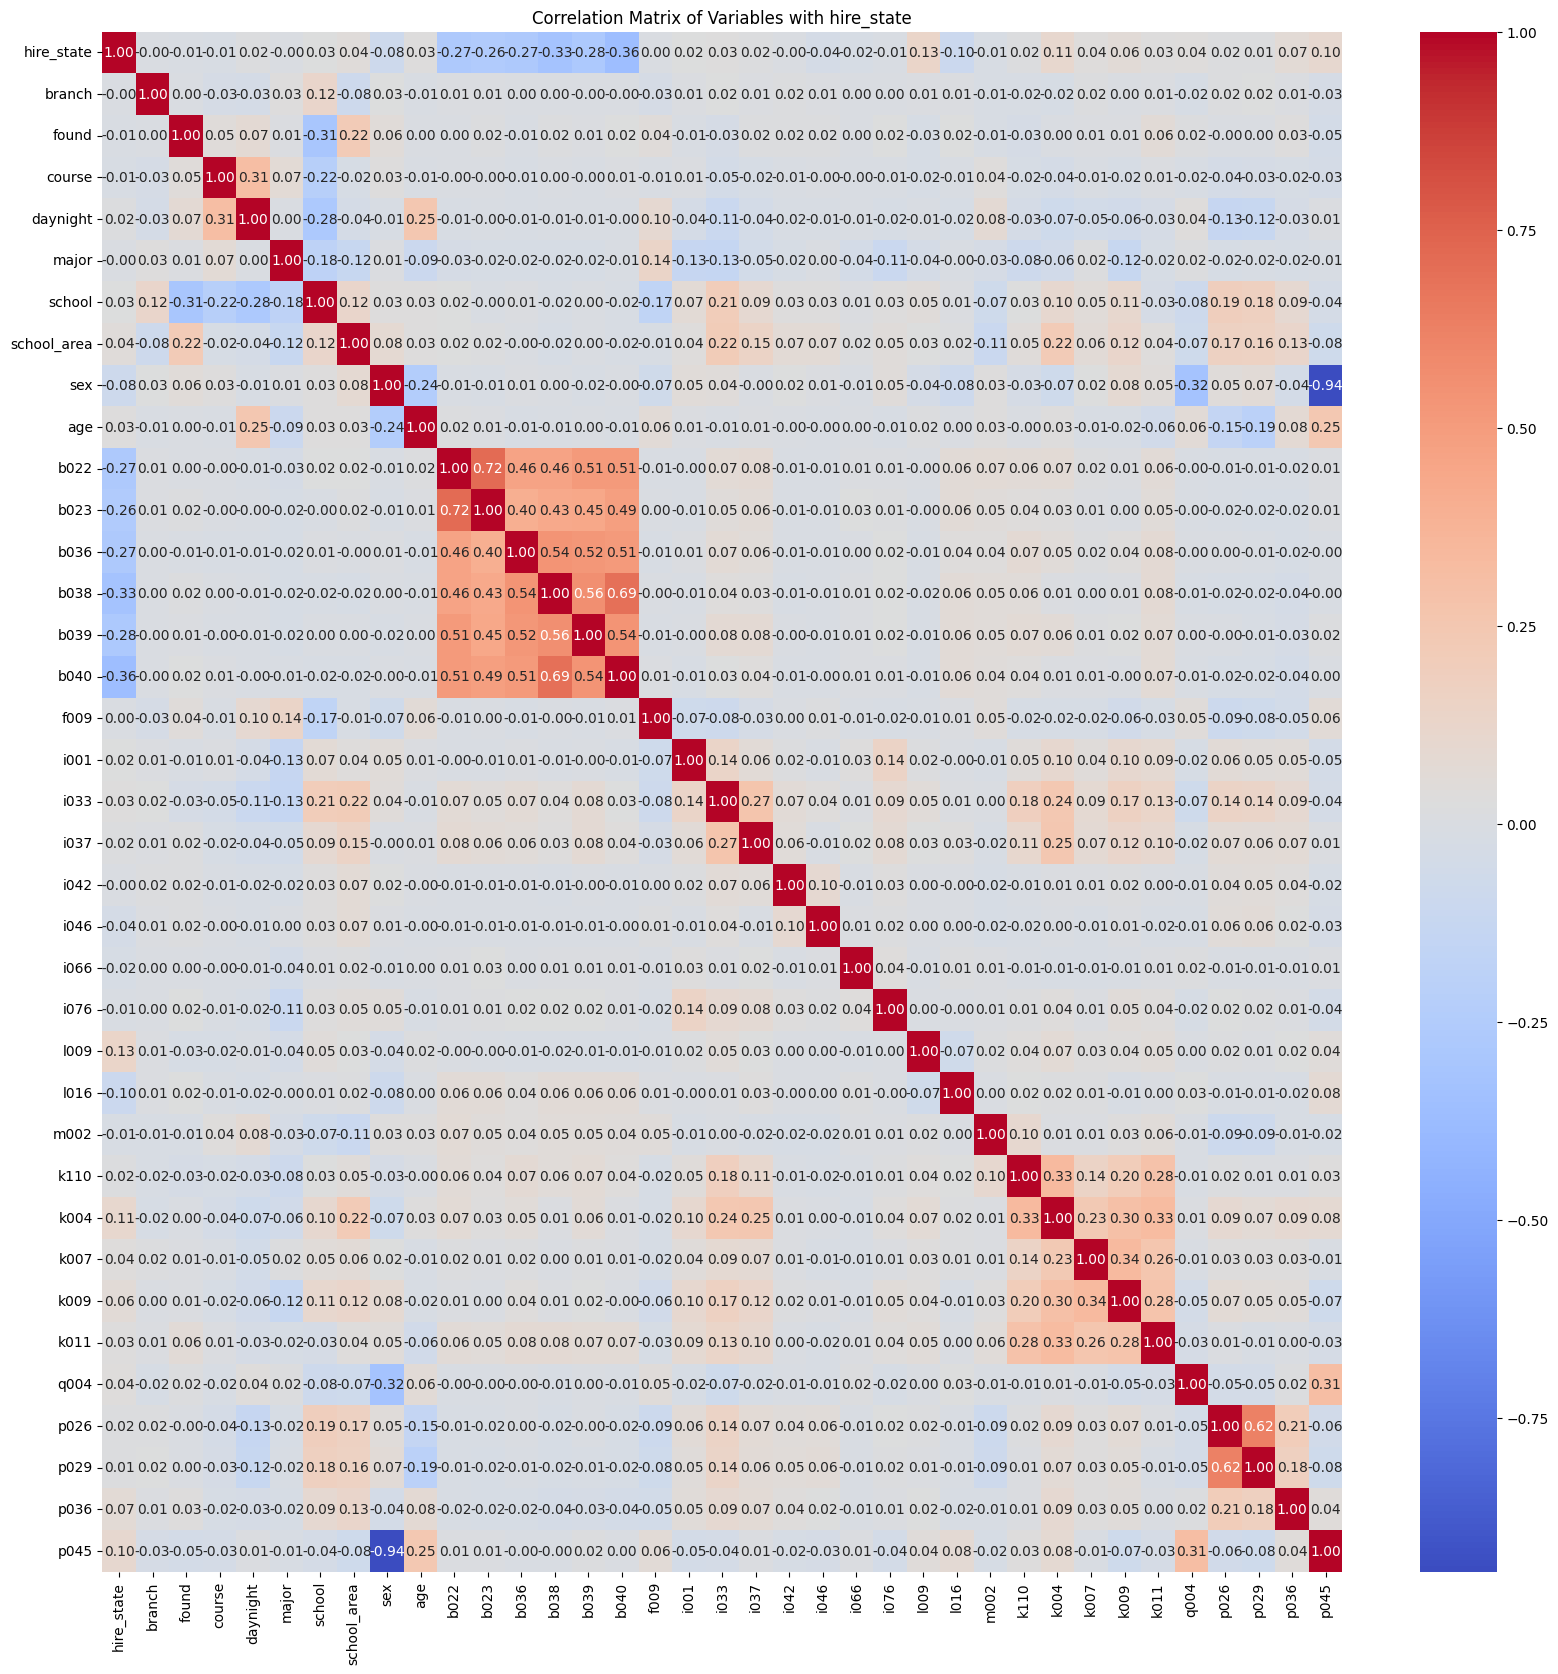

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상관관계 분석에 사용할 변수들을 선택합니다.
corr_cols = ['hire_state', 'branch', 'found', 'course', 'daynight', 'major', 'school', 'school_area', 'sex', 'age', 'b022', 'b023', 'b036', 'b038', 'b039', 'b040', 'f009', 'i001', 'i033', 'i037', 'i042', 'i046', 'i066', 'i076', 'l009', 'l016', 'm002', 'k110', 'k004', 'k007', 'k009', 'k011', 'q004', 'p026', 'p029', 'p036', 'p045']

# 선택한 변수들 간의 상관관계를 계산합니다.
corr_matrix = use_data[corr_cols].corr()

# 히트맵을 그립니다.
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables with hire_state')
plt.show()

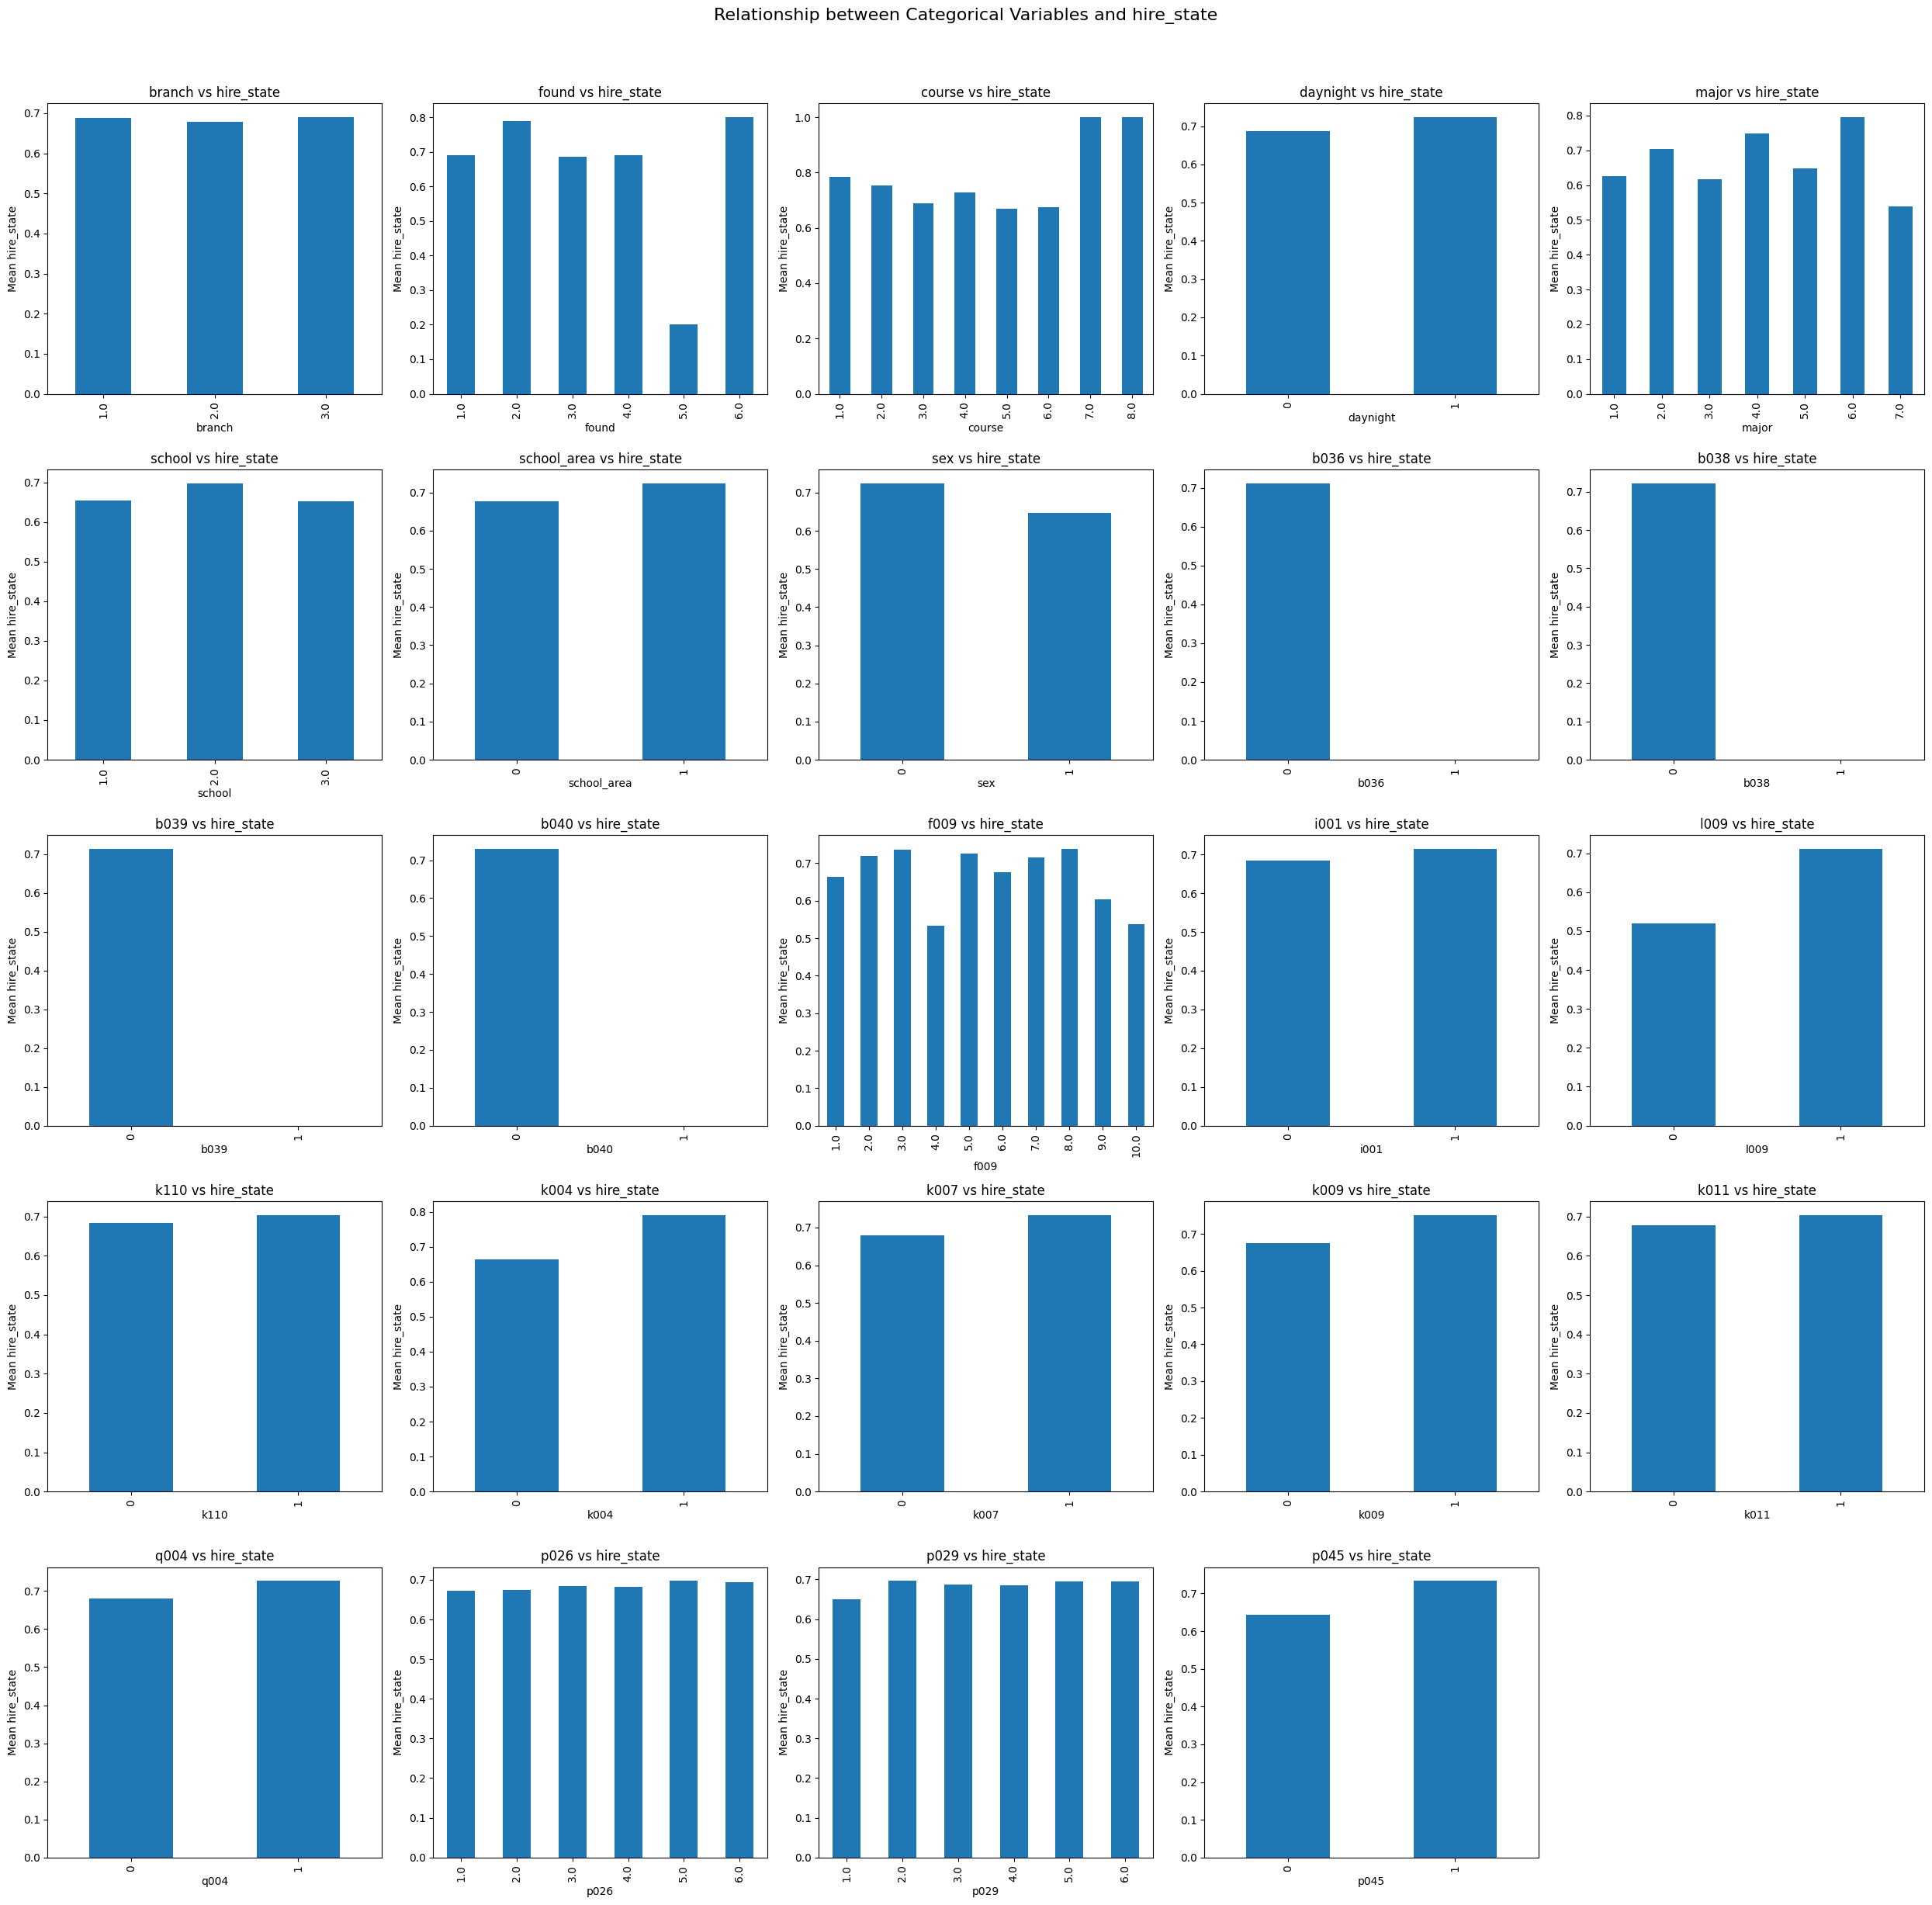

In [12]:
import matplotlib.pyplot as plt
import math

# 범주형 변수 목록
categorical_cols = ['branch', 'found', 'course', 'daynight', 'major', 'school', 'school_area', 'sex', 'b036', 'b038', 'b039', 'b040', 'f009', 'i001', 'l009', 'k110', 'k004', 'k007', 'k009', 'k011', 'q004', 'p026', 'p029', 'p045']

num_vars = len(categorical_cols)
cols = 5  # 서브플롯의 열 개수
rows = math.ceil(num_vars / cols)  # 필요한 행 개수

fig, axes = plt.subplots(rows, cols, figsize=(25, 5 * rows))
fig.suptitle("Relationship between Categorical Variables and hire_state", fontsize=16)

for i, col in enumerate(categorical_cols):
    row, col_idx = divmod(i, cols)  # 현재 변수의 행, 열 인덱스 계산
    ax = axes[row, col_idx] if rows > 1 else axes[col_idx]  # 행이 1개일 경우 처리
    
    use_data.groupby(col)['hire_state'].mean().plot(kind='bar', ax=ax)
    ax.set_title(f'{col} vs hire_state')
    ax.set_xlabel(col)
    ax.set_ylabel('Mean hire_state')

# 남은 빈 서브플롯 제거
for j in range(i + 1, rows * cols):
    row, col_idx = divmod(j, cols)
    fig.delaxes(axes[row, col_idx])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

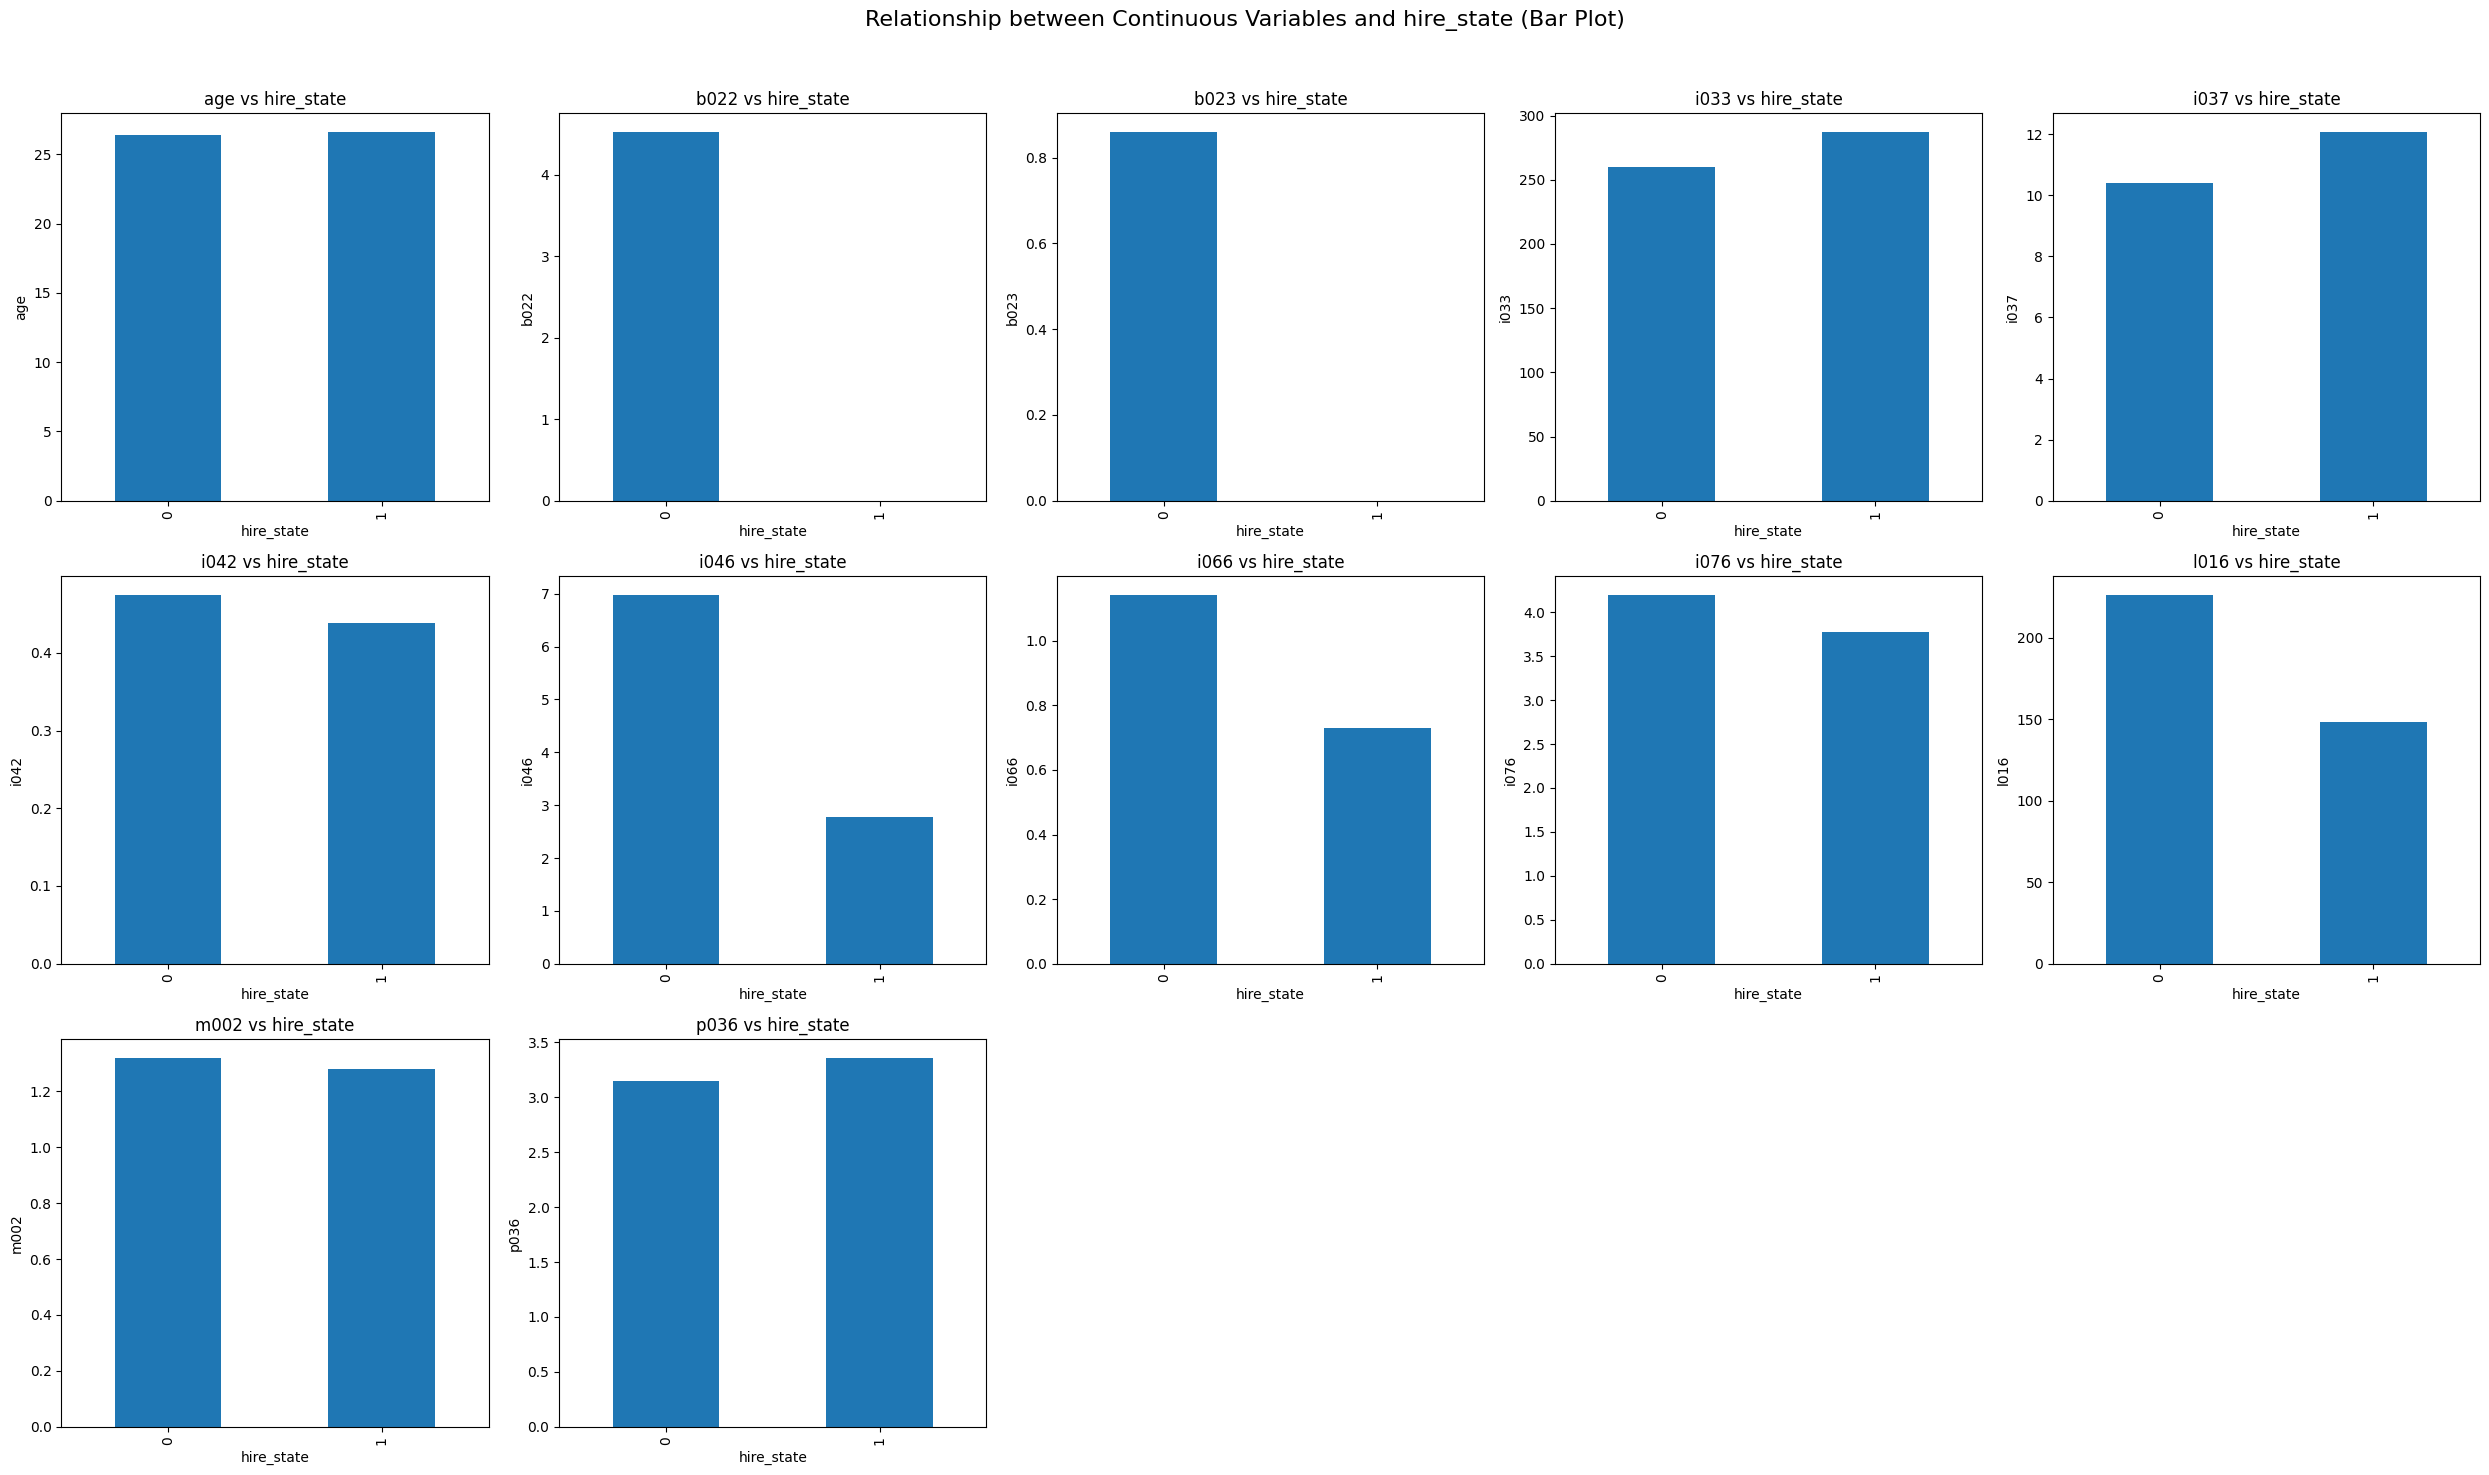

In [14]:
# 연속형 변수와 hire_state 변수 간의 관계를 막대 그래프로 시각화
fig, axes = plt.subplots(rows, cols, figsize=(25, 5 * rows))
fig.suptitle("Relationship between Continuous Variables and hire_state (Bar Plot)", fontsize=16)

for i, col in enumerate(continuous_cols):
    row, col_idx = divmod(i, cols)  # 현재 변수의 행, 열 인덱스 계산
    ax = axes[row, col_idx] if rows > 1 else axes[col_idx]  # 행이 1개일 경우 처리
    
    use_data.groupby('hire_state')[col].mean().plot(kind='bar', ax=ax)
    ax.set_title(f'{col} vs hire_state')
    ax.set_xlabel('hire_state')
    ax.set_ylabel(col)

# 남은 빈 서브플롯 제거
for j in range(i + 1, rows * cols):
    row, col_idx = divmod(j, cols)
    fig.delaxes(axes[row, col_idx])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

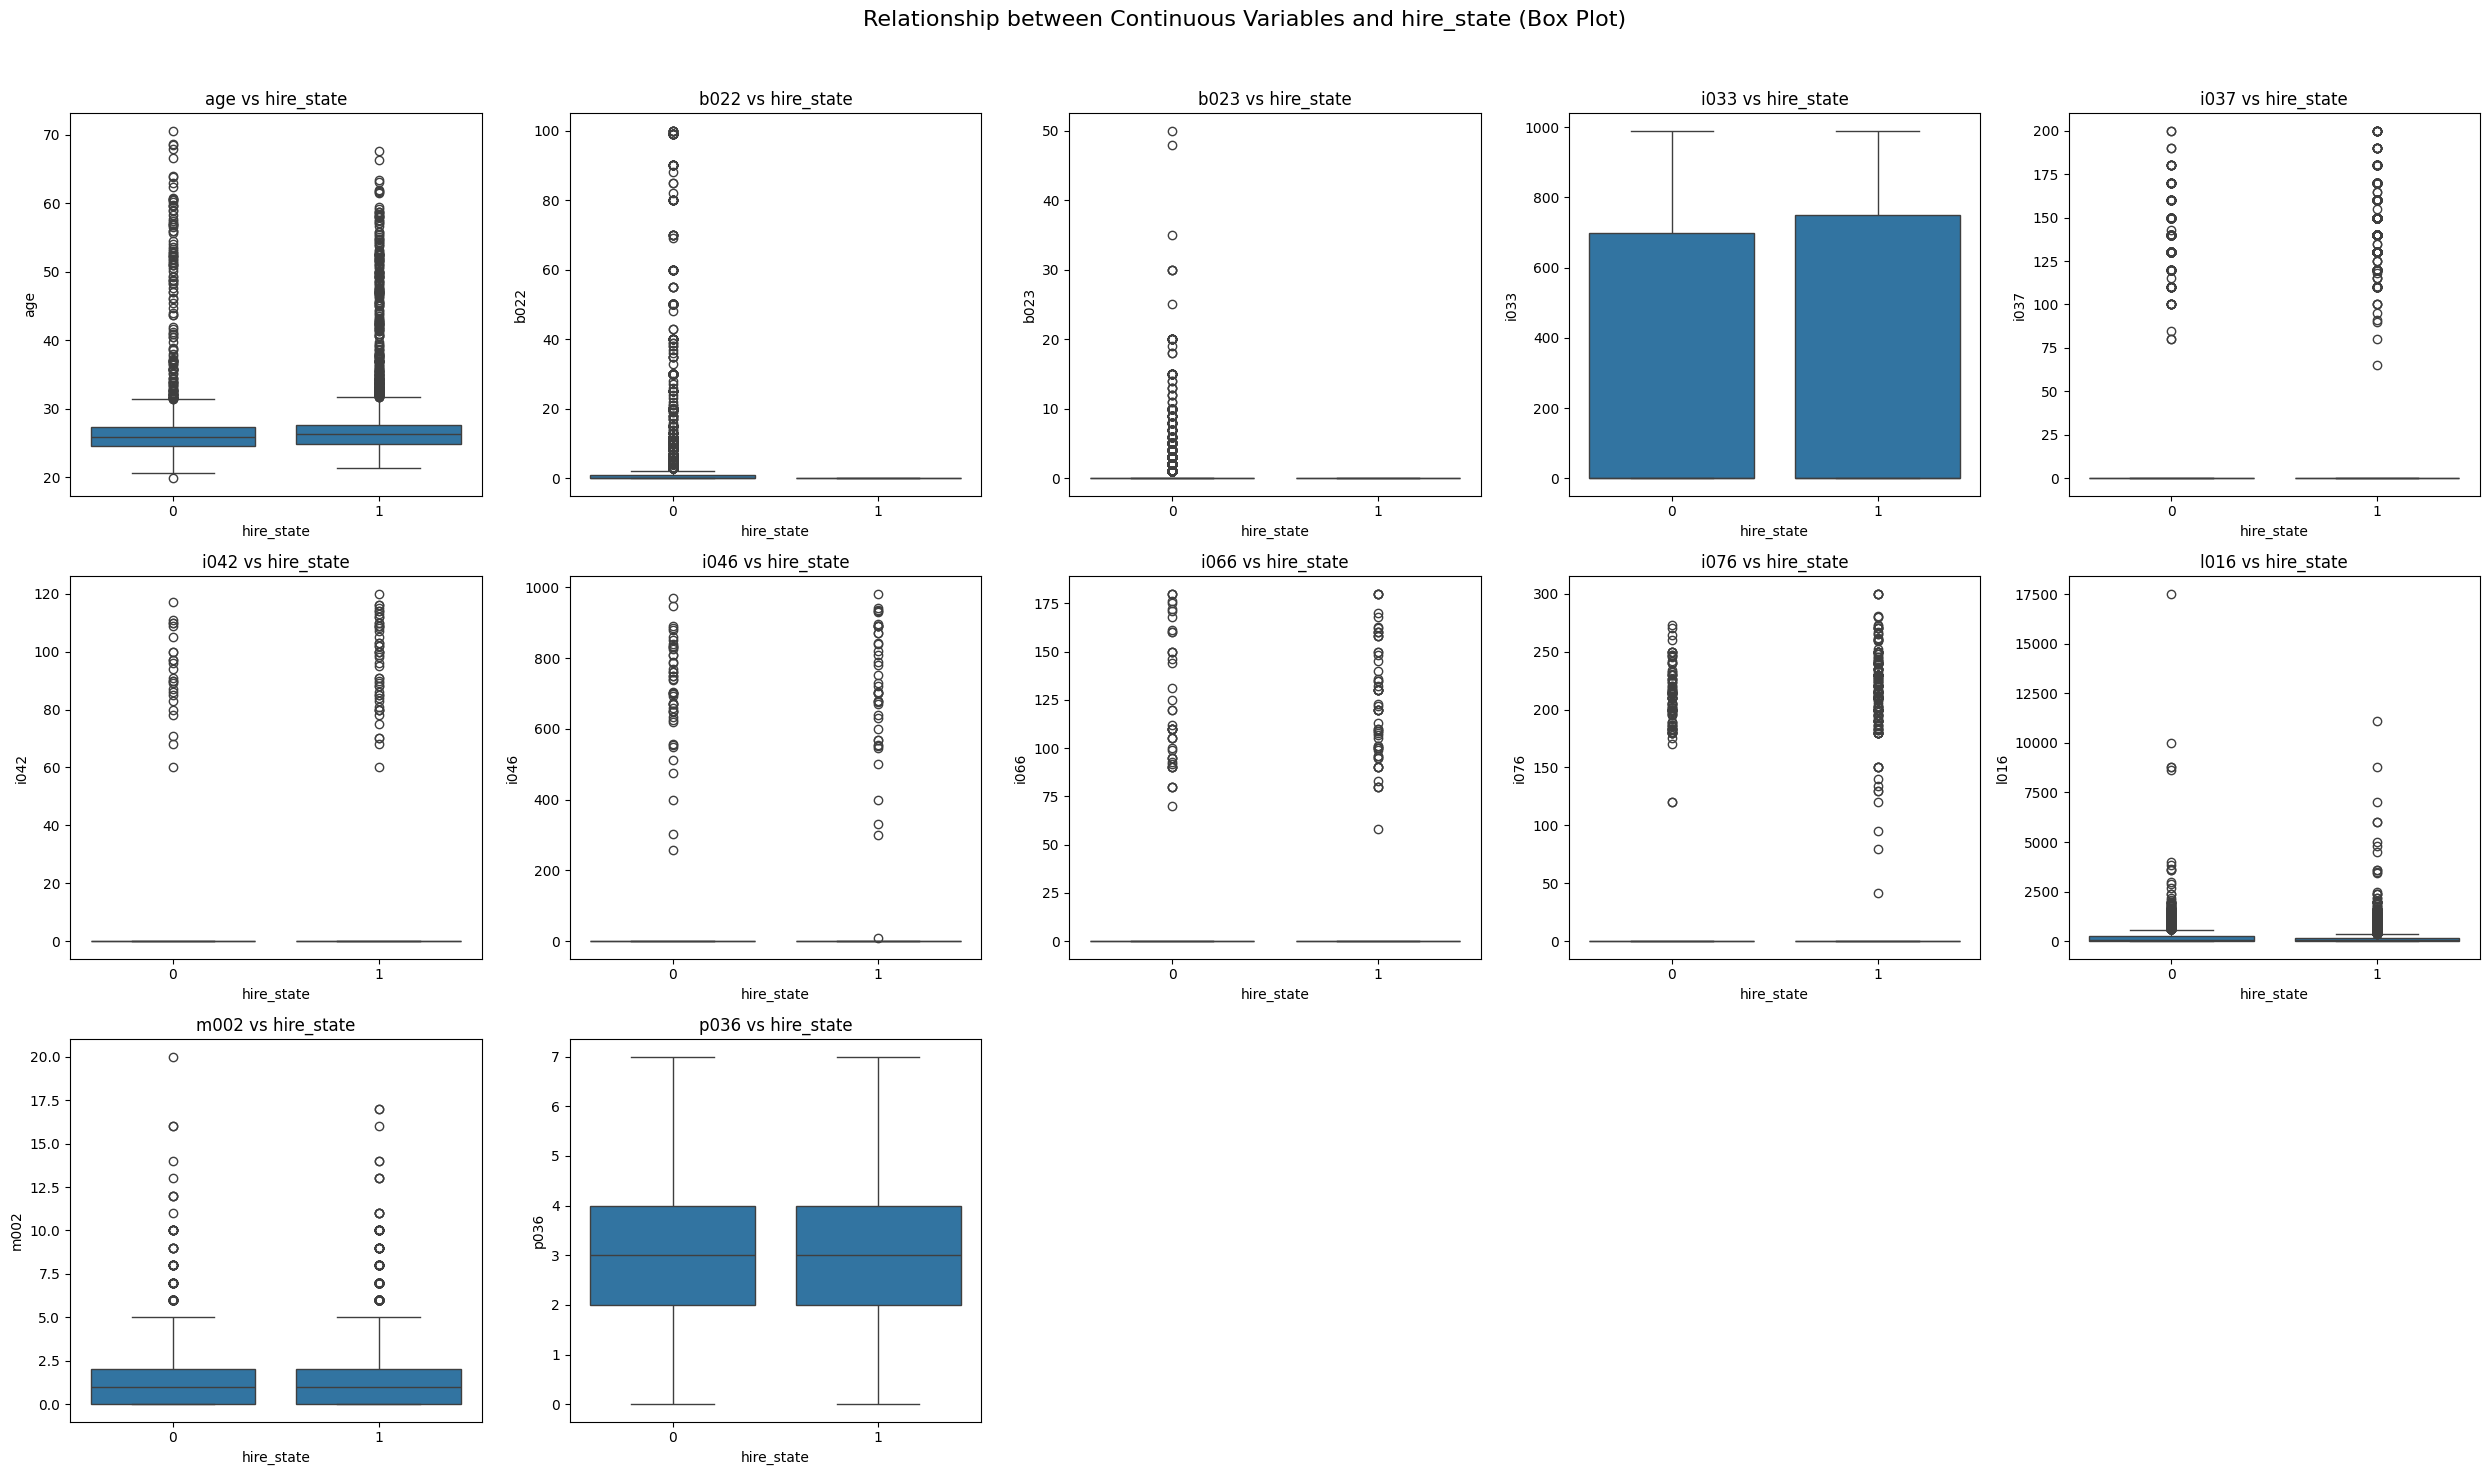

In [15]:
# 연속형 변수 목록
continuous_cols = ['age', 'b022', 'b023', 'i033', 'i037', 'i042', 'i046', 'i066', 'i076', 'l016', 'm002', 'p036']

num_vars = len(continuous_cols)
cols = 5  # 서브플롯의 열 개수
rows = math.ceil(num_vars / cols)  # 필요한 행 개수

fig, axes = plt.subplots(rows, cols, figsize=(25, 5 * rows))
fig.suptitle("Relationship between Continuous Variables and hire_state (Box Plot)", fontsize=16)

for i, col in enumerate(continuous_cols):
    row, col_idx = divmod(i, cols)  # 현재 변수의 행, 열 인덱스 계산
    ax = axes[row, col_idx] if rows > 1 else axes[col_idx]  # 행이 1개일 경우 처리
    
    sns.boxplot(x='hire_state', y=col, data=use_data, ax=ax)
    ax.set_title(f'{col} vs hire_state')
    ax.set_xlabel('hire_state')
    ax.set_ylabel(col)

# 남은 빈 서브플롯 제거
for j in range(i + 1, rows * cols):
    row, col_idx = divmod(j, cols)
    fig.delaxes(axes[row, col_idx])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()